# Predicting Car Prizes

Setting up the notebook, loading necessary libraries, defining some useful methods:

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# To reduce output size while working with vscode
%config InlineBackend.figure_format = 'png'

%matplotlib inline

# Display all columns
pd.options.display.max_columns = None

FIGURES_PATH = "plots/"
DATASETS_PATH = "datasets/"

def save_fig(name, extension="png", resolution=300):
    os.makedirs(FIGURES_PATH, exist_ok=True)
    path = os.path.join(FIGURES_PATH, name + "." + extension)
    # print("Saving figure", name)
    plt.tight_layout()
    plt.savefig(path, format=extension, dpi=resolution)

np.random.seed(42)

Loading data form CSV files:

In [2]:
AUDI_DATASET_PATH = os.path.join(DATASETS_PATH, "audi.csv")
BMW_DATASET_PATH = os.path.join(DATASETS_PATH, "bmw.csv")
FOCUS_DATASET_PATH = os.path.join(DATASETS_PATH, "focus.csv")
FORD_DATASET_PATH = os.path.join(DATASETS_PATH, "ford.csv")
HYUNDAI_DATASET_PATH = os.path.join(DATASETS_PATH, "hyundai.csv")
MERC_DATASET_PATH = os.path.join(DATASETS_PATH, "merc.csv")
SKODA_DATASET_PATH = os.path.join(DATASETS_PATH, "skoda.csv")
TOYOTA_DATASET_PATH = os.path.join(DATASETS_PATH, "toyota.csv")
VAUXHALL_DATASET_PATH = os.path.join(DATASETS_PATH, "vauxhall.csv")
VW_DATASET_PATH = os.path.join(DATASETS_PATH, "vw.csv")

audi_orig = pd.read_csv(AUDI_DATASET_PATH)
bmw_orig = pd.read_csv(BMW_DATASET_PATH)
focus_orig = pd.read_csv(FOCUS_DATASET_PATH)
ford_orig = pd.read_csv(FORD_DATASET_PATH)
hyundai_orig = pd.read_csv(HYUNDAI_DATASET_PATH)
merc_orig = pd.read_csv(MERC_DATASET_PATH)
skoda_orig = pd.read_csv(SKODA_DATASET_PATH)
toyota_orig = pd.read_csv(TOYOTA_DATASET_PATH)
vauxhall_orig = pd.read_csv(VAUXHALL_DATASET_PATH)
vw_orig = pd.read_csv(VW_DATASET_PATH)

# Audi
Predicting Audi prices.

<img src="ext/audi.png">

## Having a look at data

Firstly, create a copy of the original dataframe:

In [3]:
audi = audi_orig.copy()
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [4]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [5]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


There are no missing values, everything looks ok for now.

Get the names of numerical and categorical columns:

In [6]:
num_attribs = audi_orig.select_dtypes("number").columns.to_numpy()
cat_attribs = audi_orig.select_dtypes("object").columns.to_numpy()

Draw histograms to better know the data.

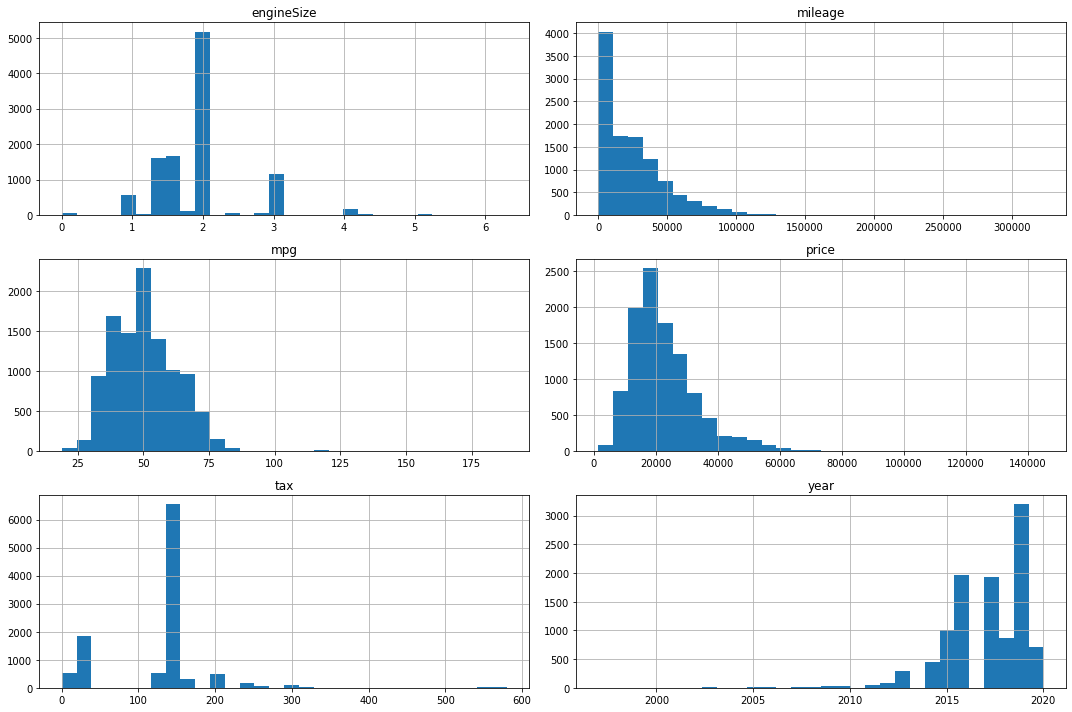

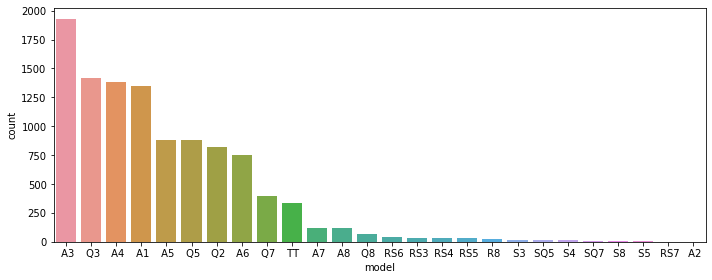

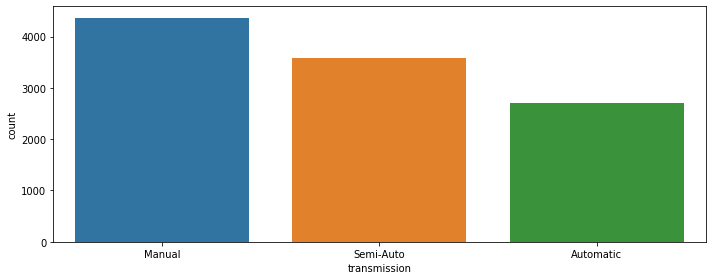

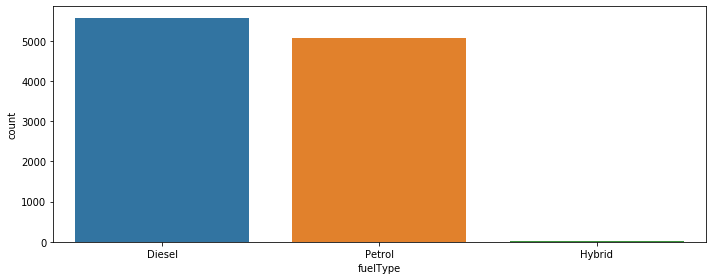

In [7]:
audi.hist(figsize=(15, 10), bins=30)
save_fig("audi_numerical_hist")
for cat in cat_attribs:
    plt.subplots(figsize=(10, 4))
    sns.countplot(cat, data=audi, order=audi[cat].value_counts().index)
    save_fig(f"audi_{cat}_hist")

## Splitting into test and train data

In [8]:
from sklearn.model_selection import train_test_split
audi_train, audi_test = train_test_split(audi_orig, random_state=42, test_size=0.2)

In [9]:
print("Train:\t", audi_train.shape)
print("Test:\t", audi_test.shape)

Train:	 (8534, 9)
Test:	 (2134, 9)


## Discovering data

Draw some plots about the correlation of attributes:

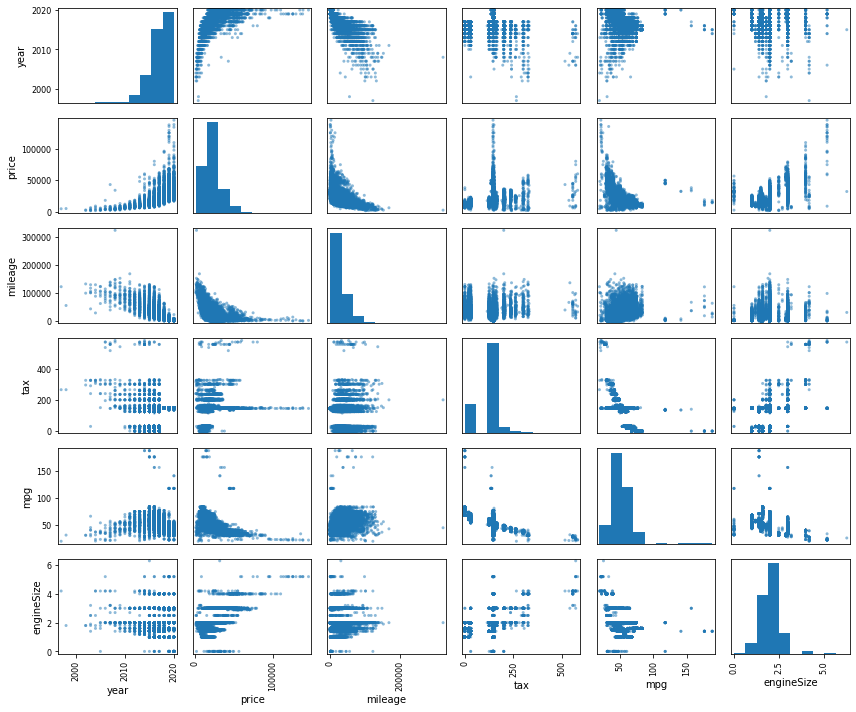

In [10]:
from pandas.plotting import scatter_matrix

attribs = num_attribs

scatter_matrix(audi[attribs], figsize=(12, 10))
save_fig("audi_scatter_matrix")

Calculate Pearson correlation coefficient:

In [11]:
corr = audi[num_attribs].corr()
corr["price"].sort_values(ascending=False)

price         1.000000
year          0.592581
engineSize    0.591262
tax           0.356157
mileage      -0.535357
mpg          -0.600334
Name: price, dtype: float64

Try to divide each attribute by another. Maybe some interesting correlations will appear.

In [12]:
audi_corr = audi_train.copy()

columns_search = num_attribs[num_attribs != "price"]
for i in columns_search:
    for j in columns_search:
        if i != j:
            i_num = audi[columns_search].columns.get_loc(i)
            j_num = audi[columns_search].columns.get_loc(j)
            audi_corr[(i_num, j_num)] = audi_corr[i] / audi_corr[j]

correlations = audi_corr.corr()["price"]
correlations = correlations[~correlations.index.isin(num_attribs)].abs().sort_values()
correlations

(2, 4)    0.101407
(3, 1)    0.106819
(4, 1)    0.107133
(0, 1)    0.114679
(2, 1)    0.115315
(4, 2)    0.268046
(2, 0)    0.359379
(0, 2)    0.377480
(3, 2)    0.406312
(1, 3)    0.415220
(1, 2)    0.417136
(2, 3)    0.454619
(0, 4)    0.488043
(1, 0)    0.537276
(4, 0)    0.581163
(3, 0)    0.596768
(3, 4)    0.614809
(1, 4)    0.624549
(0, 3)    0.720580
(4, 3)    0.740665
Name: price, dtype: float64

Create a method which add new attributes to the dataframe. It will be used later.

In [13]:
def divided_attributes(X, min_corr=0.7):
    new_attribs = []
    for i, j in correlations[correlations >= min_corr].index:
        new_attribs.append((X[:, i] / X[:, j]).reshape((-1, 1)))
    new_attribs = np.concatenate(new_attribs, axis=1)
    return np.concatenate((X, new_attribs), axis=1)

## Preparing data

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer, StandardScaler, OneHotEncoder, Normalizer
from sklearn.compose import ColumnTransformer

Split into X and y:

In [15]:
X_train = audi_train.drop("price", axis=1)
X_test = audi_test.drop("price", axis=1)
y_train = audi_train[["price"]].to_numpy()
y_test = audi_test[["price"]].to_numpy()

In [16]:
num_attribs = X_train.select_dtypes("number").columns
cat_attribs = X_train.select_dtypes("object").columns

Define pipelines for data transformations:

In [17]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("additional_attribs", FunctionTransformer(divided_attributes, kw_args={"min_corr":0.65})),
    ("polynomial_attribs", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

label_pipeline = Pipeline([
    ("scaler", StandardScaler()),
])

Transform the data:

In [18]:
X_train = full_pipeline.fit_transform(X_train, y_train)
X_test = full_pipeline.transform(X_test)

y_train = label_pipeline.fit_transform(y_train)

y_test = label_pipeline.transform(y_test)

# Building models

In [19]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def train_evaluate(model, X_train, y_train, X_test, y_test, cv=10):
    # model.fit(X_train, y_train)
    scores = cross_val_score(model, X_test, y_test, cv=cv, scoring="neg_mean_absolute_error")
    print("Model:\t", model)
    print("Mean MAE:\t", -scores.mean())
    print("StD MAE:\t", scores.std())

### Decision Tree Regression

In [20]:
%%time
from sklearn.tree import DecisionTreeRegressor

train_evaluate(DecisionTreeRegressor(), X_train, y_train, X_train, y_train)

Model:	 DecisionTreeRegressor()
Mean MAE:	 0.16950809615567608
StD MAE:	 0.0055735755969283434
Wall time: 1.93 s


In [21]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"max_depth": [12, 15, 17, 20],
     "splitter": ["random", "best"],
     "random_state": [42],
     "min_samples_split": [3, 4, 5, 6]}
]

tree = DecisionTreeRegressor()
grid_search = GridSearchCV(tree, param_grid, cv=10, scoring="neg_mean_absolute_error", verbose=1)
grid_search.fit(X_train, y_train)

print("Best params:\t", grid_search.best_params_)
print("Best MAE:\t", -grid_search.best_score_)
best_tree = grid_search.best_estimator_

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best params:	 {'max_depth': 12, 'min_samples_split': 3, 'random_state': 42, 'splitter': 'random'}
Best MAE:	 0.1502318724980814
Wall time: 29.6 s
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   29.4s finished


### Random Forest Regression

In [22]:
%%time
from sklearn.ensemble import RandomForestRegressor

train_evaluate(RandomForestRegressor(n_jobs=16), X_train, y_train, X_train, y_train)

Model:	 RandomForestRegressor(n_jobs=16)
Mean MAE:	 0.13268006984819777
StD MAE:	 0.0042537925383381026
Wall time: 16.8 s


In [23]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [50, 100, 200],
     "random_state": [42],
     "warm_start": [True, False],
     "oob_score": [True, False],
     "bootstrap": [True, False],
     "min_samples_split": [5, 6, 7, 8]}
]

forest = RandomForestRegressor()
grid_search = GridSearchCV(forest, param_grid, cv=10, scoring="neg_mean_absolute_error", verbose=1, n_jobs=16)
grid_search.fit(X_train, y_train)

print("Best params:\t", grid_search.best_params_)
print("Best MAE:\t", -grid_search.best_score_)
best_forest = grid_search.best_estimator_

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.7s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  2.5min
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:  6.7min
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed: 11.2min
[Parallel(n_jobs=16)]: Done 960 out of 960 | elapsed: 14.5min finished
Best params:	 {'bootstrap': True, 'min_samples_split': 7, 'n_estimators': 200, 'oob_score': True, 'random_state': 42, 'warm_start': True}
Best MAE:	 0.13150028709545714
Wall time: 14min 50s


## Final Predictions

In [24]:
predictions = best_forest.predict(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error

final_r2 = r2_score(y_test, predictions)
final_mae = mean_absolute_error(y_test, predictions)

print("Final R²:\t", final_r2)
print("Final MAE:\t", final_mae)

Final R²:	 0.9647713576677709
Final MAE:	 0.13111921633046353
